__1. Import the required libraries.__

In [1]:
import torch
import torchvision
import numpy as np
import torch.nn as nn
from PIL import Image
import torch.optim as optim
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch.autograd import Variable
import torchvision.datasets as datasets
import torchvision.transforms as transforms

__2.Define the train and test dataset loader.__

In [2]:
# Setting up the directories to read the data
train_directory = 'root/train'
test_directory = 'root/test'

In [3]:
def loadTrainTest(train_dir, test_dir, batch_size):
    # Transformation for image transforms.Grayscale(1), 
    transformation = transforms.Compose([ transforms.Grayscale(1),
                                             transforms.Resize((28,28)),
                                                 transforms.ToTensor(), 
                                                        transforms.Normalize((0.5, ), (0.5, ))])
   # transformation1 = transforms.Compose([transforms.Resize(28),
                                          #transforms.Grayscale(), transforms.ToTensor(), 
                                     #transforms.Normalize((0.5, ), (0.5, ))])
    
    # Load train and test dataset with ImageFolder
    train_dataset = datasets.ImageFolder(root = train_dir, 
                                         transform = transformation)
    test_dataset = datasets.ImageFolder(root = test_dir, 
                                        transform = transformation)
    
    # Load train and test dataset into batches
    trainloader = torch.utils.data.DataLoader(dataset = train_dataset, 
                                         batch_size = batch_size,
                                         shuffle = True)
    testloader = torch.utils.data.DataLoader(dataset = test_dataset, 
                                         batch_size = batch_size,
                                         shuffle = True)
    return trainloader, testloader, train_dataset.classes


batch_size = int(input('Enter batch size. '))
train_load, test_load, classes = loadTrainTest(train_directory, test_directory, batch_size)

print('Classes: ', classes) # print number of classes

Enter batch size. 4
Classes:  ['1', '10', '2', '3', '4', '5', '6', '7', '8', '9']


__3.Show a batch of images__

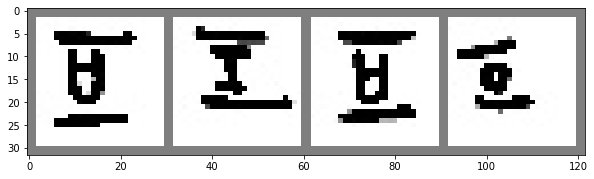

In [4]:
def imshow(image):
    if isinstance(image, torch.Tensor):
        image = image.numpy().transpose((1, 2, 0))  
    else:
        image = np.array(image).transpose((1, 2, 0))
    # unnormalize
    image = 0.5*image + 0.5
    # Plot
    
    plt.figure(figsize=(10,10))
    plt.imshow(image)
    
    
# get some random training images
images, labels = next(iter(train_load))
imshow(torchvision.utils.make_grid(images))  # show images

__4. Define the architecture of your network.__

In [5]:
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(1*28*28, 84)
        self.fc2 = nn.Linear(84, 50)
        self.fc3 = nn.Linear(50,10)
        
    def forward(self, x):
        x = x.view(-1, 1*28*28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
model = SimpleNet()
print(model)

SimpleNet(
  (fc1): Linear(in_features=784, out_features=84, bias=True)
  (fc2): Linear(in_features=84, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=10, bias=True)
)


__4. Define a Loss function and optimizer__

In [6]:
def lossAndoptimizer(ls, op, lr = 1e-2):
    loss_func = {'entropy' : nn.CrossEntropyLoss(),  
                         'nll': nn.NLLLoss() }
    
    optimizer_func = {'sgd': optim.SGD(model.parameters(), lr), 
                          'adam': optim.Adam(model.parameters(), lr),
                             'adagrad': optim.Adagrad(model.parameters(), lr),
                                 'rms': optim.RMSprop(model.parameters(), lr) }
    
    return loss_func[ls], optimizer_func[op]


loss_f = input(''' Write the type of loss function you want. 
                        'entropy' for CrossEntropyLoss 
                        'nll' for NLLLoss \n''')

print()
optimizer_f = input('''Write the type of optimizer function you want.
                        'sgd' for SGD 
                        'adam' for Adam
                        'rms' for RMSprop
                        'adagrad' for Adagrad \n''')

print(f'\nSelected loss function: {loss_f} \nSelected optimizer function: {optimizer_f}')
criterion, optimizer = lossAndoptimizer(loss_f, optimizer_f)

 Write the type of loss function you want. 
                        'entropy' for CrossEntropyLoss 
                        'nll' for NLLLoss 
entropy

Write the type of optimizer function you want.
                        'sgd' for SGD 
                        'adam' for Adam
                        'rms' for RMSprop
                        'adagrad' for Adagrad 
sgd

Selected loss function: entropy 
Selected optimizer function: sgd


__5. Train your model.__

In [7]:
def train_model(trainload, criteria, optimizer, epochs):
    print('\nTraining started.......\n')
    for epoch in range(epochs):  # loop over the dataset multiple times
        running_loss = 0.0       # Set the running loss at each epoch to zero
        for i, data in enumerate(trainload):
            inputs, labels = data  # get the inputs; data is a list of [inputs, labels]
            optimizer.zero_grad()  # clear the gradient
            outputs = model(inputs) # feed the input and acquire the output from network
            loss = criterion(outputs, labels) # calculating the predicted and the expected loss
            loss.backward()    # Backpropagation
            optimizer.step()    # update the parameters
            # print statistics
            running_loss += loss.item()
            if i % 2000 == 0: # print every 2000 mini-batches
                print(f"ephoch {epoch + 1}, loss {loss.item():.4f}")
                print('-----------------------')
    print('\nFinished Training!')
    return model
    
epochs = int(input('Enter the number of epochs. '))    
model = train_model(train_load, criterion, optimizer, epochs)

Enter the number of epochs. 20

Training started.......

ephoch 1, loss 2.2394
-----------------------
ephoch 2, loss 2.2852
-----------------------
ephoch 3, loss 1.7374
-----------------------
ephoch 4, loss 1.2069
-----------------------
ephoch 5, loss 0.8446
-----------------------
ephoch 6, loss 0.3691
-----------------------
ephoch 7, loss 0.3664
-----------------------
ephoch 8, loss 0.6353
-----------------------
ephoch 9, loss 0.3362
-----------------------
ephoch 10, loss 0.2227
-----------------------
ephoch 11, loss 0.9376
-----------------------
ephoch 12, loss 0.5820
-----------------------
ephoch 13, loss 0.2350
-----------------------
ephoch 14, loss 0.0948
-----------------------
ephoch 15, loss 0.0615
-----------------------
ephoch 16, loss 0.1912
-----------------------
ephoch 17, loss 0.2178
-----------------------
ephoch 18, loss 0.6495
-----------------------
ephoch 19, loss 0.1527
-----------------------
ephoch 20, loss 0.0306
-----------------------

Finished Tr

__6.Testing the model.__

GroundTruth:      5     3     7     3


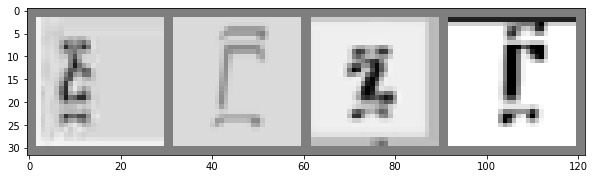

In [8]:
""" 
get some random testing images
make an iterator from test_loader
Get a batch of training images
"""
images, labels = next(iter(test_load))

# print images and labels
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

Predicted:      3     3     6     3


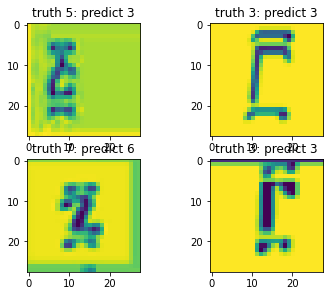

In [9]:
results = model(images)
_, predicted = torch.max(results, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(batch_size)))

fig2 = plt.figure()
plt.subplots_adjust(top = 0.99)
for i in range(batch_size):
    fig2.add_subplot(2,2, i+1)
    plt.title('truth ' + classes[labels[i]] + ': predict ' + classes[predicted[i]])
    img = images[i] / 2 + 0.5     # this is to unnormalize the image
    img = torchvision.transforms.ToPILImage()(img)
    plt.imshow(img)
plt.show()

__7.Network performance__

In [10]:
# Network performance
def accuracy(model, test_load):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_load:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total, correct, total

acc, correct, total  = accuracy(model, test_load)
print(f'Accuracy of the network on the {total} test images is: {acc}')
print(f'{correct} images out of {total} are correctly predicted')

Accuracy of the network on the 210 test images is: 49.523809523809526
104 images out of 210 are correctly predicted


#### Comparison b/n different loss and optimizer
| epoch |Loss  | Optimizer | Accuracy |
|:------|:-----------:|:----------:|:------|
|20|CrossEntropyLoss|SGD|49.523809523809526|
|20|CrossEntropyLoss|Adam|39.04761904761905|
|20|CrossEntropyLoss|RMSprop|37.142857142857146|
|20|CrossEntropyLoss|Adagrad|38.095238095238095|
|20|NLLLoss|SGD|42.38095238095238|
|20|NLLLoss|Adam|27.142857142857142|
|20|NLLLoss|RMSprop|24.285714285714285|
|20|NLLLoss|Adagrad|29.523809523809526|